In [28]:
import pandas as pd
import json
from pandas.io.json import json_normalize
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as md
import numpy as np
from datetime import datetime
import matplotlib.dates as mdates

In [21]:
data = open("data.json","r")
activities = json.loads(data.read())
df= pd.DataFrame(activities)
df= df[["athlete","name","distance","moving_time","elapsed_time","start_latlng","total_elevation_gain","type","average_temp","start_date_local","location_city","location_country","kudos_count","average_speed","max_speed","has_heartrate","average_heartrate","max_heartrate","elev_high","elev_low","pr_count"]]
df['start_date_local']=pd.to_datetime(df['start_date_local'])
df['start_time']=df['start_date_local'].dt.time
df['start_date']=df['start_date_local'].dt.date
df['start_date']=pd.to_datetime(df['start_date'])
df['start_time']= pd.to_datetime(df['start_time'], format='%H:%M:%S')
df.head(5)

,athlete,name,distance,moving_time,elapsed_time,start_latlng,total_elevation_gain,type,average_temp,start_date_local,...,average_speed,max_speed,has_heartrate,average_heartrate,max_heartrate,elev_high,elev_low,pr_count,start_time,start_date
0,"{'id': 41223837, 'resource_state': 1}",Morning Run,9123.6,2789,2843,"[51.54054220765829, -0.15161932446062565]",119.5,Run,NaN,2023-06-07 08:08:04+00:00,...,3.271,4.553,True,144.5,172.0,114.9,31.1,0,1900-01-01 08:08:04,2023-06-07
1,"{'id': 41223837, 'resource_state': 1}",Morning Ride,112765.0,19969,24624,"[51.24082714319229, -0.32408284954726696]",1541.0,Ride,15.0,2023-06-05 10:21:31+00:00,...,5.647,15.594,False,NaN,NaN,244.4,14.8,30,1900-01-01 10:21:31,2023-06-05
2,"{'id': 41223837, 'resource_state': 1}",Afternoon Swim,1200.0,1455,1705,[],0.0,Swim,NaN,2023-06-02 13:00:29+00:00,...,0.825,5.797,False,NaN,NaN,NaN,NaN,0,1900-01-01 13:00:29,2023-06-02
3,"{'id': 41223837, 'resource_state': 1}",Lunch Run,16040.2,4445,4512,"[51.54071470722556, -0.15175343491137028]",140.9,Run,NaN,2023-06-01 11:53:27+00:00,...,3.609,6.012,True,158.7,186.0,114.9,29.0,7,1900-01-01 11:53:27,2023-06-01
4,"{'id': 41223837, 'resource_state': 1}",Morning Run,10250.1,3375,3413,"[51.54023543000221, -0.151614211499691]",136.6,Run,NaN,2023-05-31 07:22:34+00:00,...,3.037,5.327,True,134.7,156.0,114.9,31.1,6,1900-01-01 07:22:34,2023-05-31


In [23]:
#Set cuts of data
runs= df.loc[df["type"]=="Run"]
runs['pace']= 1000/(runs["average_speed"]*60)
short_runs= runs.loc[df["distance"] <= 10000]
#runs=runs[runs['start_date'] < '2022-1-1']
runs.reset_index(inplace=True)

rides=df.loc[df["type"]=="Ride"]
rides["pace"]= rides["average_speed"]*3.6
rides.reset_index(inplace=True)

/var/folders/_s/k6zmybnj6j1cgzb3bwm8bkym0000gn/T/ipykernel_1032/3872133210.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runs['pace']= 1000/(runs["average_speed"]*60)
/var/folders/_s/k6zmybnj6j1cgzb3bwm8bkym0000gn/T/ipykernel_1032/3872133210.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rides["pace"]= rides["average_speed"]*3.6


Text(0.5, 1.0, 'Average Speed vs elevation')

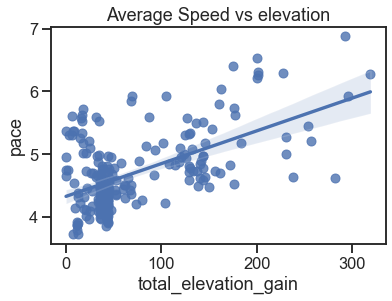

In [4]:
sns.set(style="ticks", context="talk")
sns.regplot(x='total_elevation_gain', y = 'pace', data = runs).set_title("Average Speed vs elevation")


Text(0.5, 1.0, 'Average Speed vs Distance on Short Runs (<10,000)')

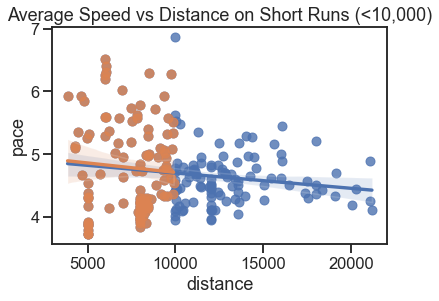

In [5]:
sns.set(style="ticks", context="talk")
sns.regplot(x='distance', y = 'pace', data = runs).set_title("Average Speed vs Distance")

sns.set(style='ticks', context='talk')
sns.regplot(x='distance',y='pace',data=short_runs).set_title("Average Speed vs Distance on Short Runs (<10,000)")

/var/folders/_s/k6zmybnj6j1cgzb3bwm8bkym0000gn/T/ipykernel_1032/791461470.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


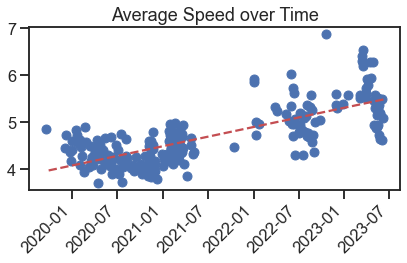

In [6]:
fig = plt.figure() #create overall container
ax1 = fig.add_subplot(111) #add a 1 by 1 plot to the figure
x = np.asarray(runs.start_date)  #convert data to numpy array
y = np.asarray(runs.pace)
ax1.plot_date(x, y) #plot data points in scatter plot on ax1
ax1.set_title('Average Speed over Time')
#ax1.set_ylim([0,5])

#add trend line
x2 = mdates.date2num(x)
z=np.polyfit(x2,y,1)
p=np.poly1d(z)
plt.plot(x,p(x2),'r--')

#format the figure and display
fig.autofmt_xdate(rotation=45)
fig.tight_layout()
fig.show()

In [15]:
runs["start_time"]= pd.Date

0      08:08:04
1      11:53:27
2      07:22:34
3      17:49:44
4      17:09:41
         ...   
215    12:04:42
216    11:10:00
217    14:01:26
218    18:48:18
219    13:10:01
Name: start_time, Length: 220, dtype: object

In [ ]:
df[]

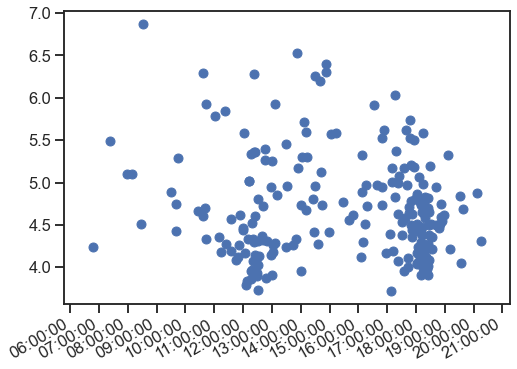

In [30]:
'''
fig = plt.figure() #create overall container
ax1 = fig.add_subplot(111) #add a 1 by 1 plot to the figure
x = np.asarray(runs.start_time)  #convert data to numpy array
y = np.asarray(runs.pace)
ax1.plot(x, y) #plot data points in scatter plot on ax1
ax1.set_title('Average Speed over Time')
#ax1.set_ylim([0,5])

#add trend line

x2 = mdates.date2num(x)
z=np.polyfit(x2,y,1)
p=np.poly1d(z)
plt.plot(x,p(x2),'r--')
'''

#format the figure and display
fig, ax = plt.subplots(figsize=(8,6))
x = np.asarray(runs.start_time)  #convert data to numpy array
y = np.asarray(runs.pace)

ax.plot_date(x,y)
ax.set_xlim(runs['start_time'].min()-pd.Timedelta(1,'h'),
            runs['start_time'].max()+pd.Timedelta(1,'h'))

ax.xaxis.set_major_locator(md.HourLocator(interval = 1))
ax.xaxis.set_major_formatter(md.DateFormatter('%H:%M:%S'))

fig.autofmt_xdate()

plt.show()

In [8]:
most_kudos= df.loc[df['kudos_count'].idxmax()]
fastest_ride= rides.loc[rides['kudos_count'].idxmax()]
fastest_ride

index                                                     114
athlete                 {'id': 41223837, 'resource_state': 1}
name                                             Morning Ride
distance                                              82214.3
moving_time                                             11473
elapsed_time                                            12942
start_latlng                           [51.445275, -0.151205]
total_elevation_gain                                    910.0
type                                                     Ride
average_temp                                             10.0
start_date_local                    2021-04-04 10:52:57+00:00
location_city                                            None
location_country                                         None
kudos_count                                                16
average_speed                                           7.166
max_speed                                                17.8
has_hear

In [132]:
# Fastest ride
# Time of day pace
# Elevation vs pace
# My stats in certain areas

In [134]:
# Need segment data
# My stats on certain segments
# Segment grouping